Libraries imported successfully.
Dataset loaded successfully.

Starting data cleaning...
Data cleaning complete. Rows with missing values have been removed.

Creating visualizations to understand the data...


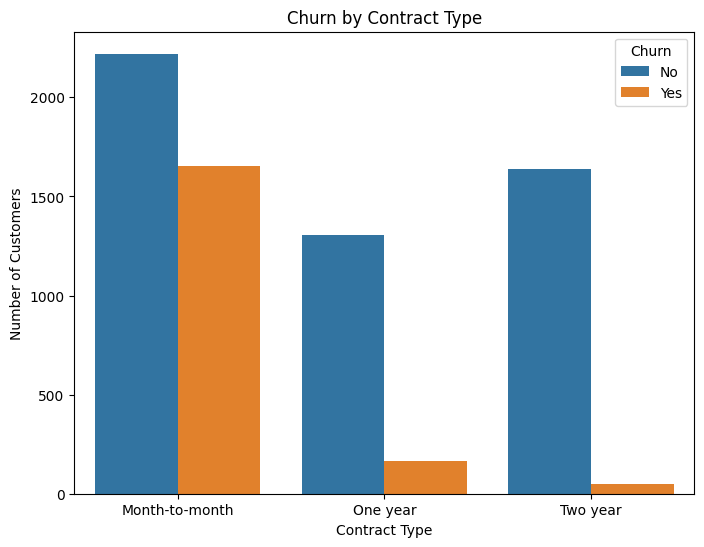

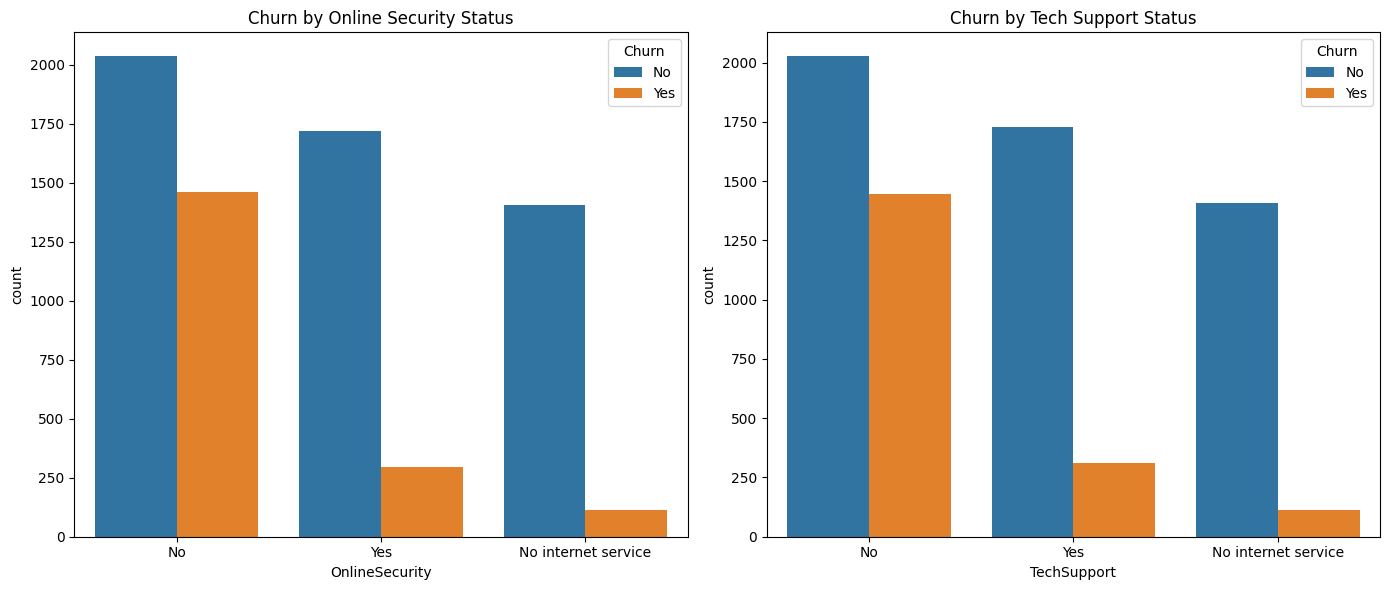

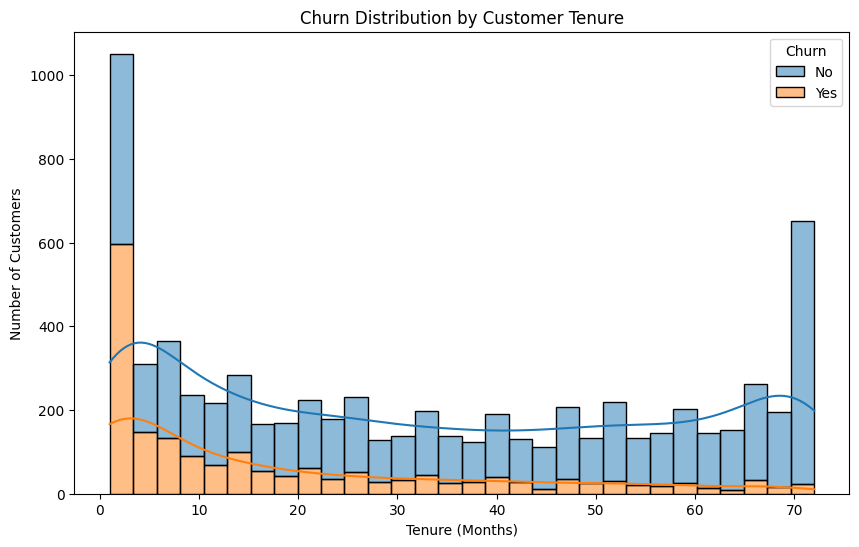


--- End of Step 3 ---


In [ ]:

# Import all necessary libraries for this step
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset from the 'data' folder
try:
    df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("ERROR: Dataset file not found. Make sure 'WA_Fn-UseC_-Telco-Customer-Churn.csv' is in the 'data' folder.")


# --- Action 1: Fix Data Type and Handle Missing Values ---
print("\nStarting data cleaning...")

# The 'TotalCharges' column should be numeric, but it's an 'object' type.
# We convert it, and any values that can't be converted (like empty spaces) become 'NaN'.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now we remove the few rows that have these missing values.
df.dropna(inplace=True)
print("Data cleaning complete. Rows with missing values have been removed.")


# --- Action 2: Visualize Churn Patterns ---
print("\nCreating visualizations to understand the data...")

# Visualization 1: Churn by Contract Type
# This helps us see if contract length affects customer loyalty.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()


# Visualization 2: Churn by Key Services
# Do customers with protective services like Online Security and Tech Support churn less?
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) # Create a figure with 2 subplots

sns.countplot(ax=axes[0], data=df, x='OnlineSecurity', hue='Churn')
axes[0].set_title('Churn by Online Security Status')

sns.countplot(ax=axes[1], data=df, x='TechSupport', hue='Churn')
axes[1].set_title('Churn by Tech Support Status')

plt.tight_layout() # Adjusts plot to prevent labels overlapping
plt.show()


# Visualization 3: Churn by Customer Tenure
# How does the length of time a customer has been with the company affect churn?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, kde=True)
plt.title('Churn Distribution by Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

print("\n--- End of Step 3 ---")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
